In [2]:
import pandas as pd 
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [10]:
!wget "https://raw.githubusercontent.com/codebasics/py/master/ML/1_linear_reg/homeprices.csv"


--2025-09-27 20:55:05--  https://raw.githubusercontent.com/codebasics/py/master/ML/1_linear_reg/homeprices.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71 [text/plain]
Saving to: 'homeprices.csv'

     0K                                                       100% 1.40M=0s

2025-09-27 20:55:06 (1.40 MB/s) - 'homeprices.csv' saved [71/71]



In [11]:
df = pd.read_csv("homeprices.csv")


In [12]:
df.head()

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


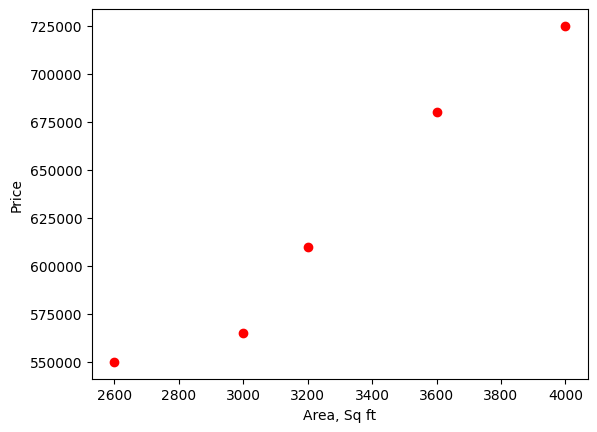

In [16]:
%matplotlib inline
plt.xlabel("Area, Sq ft")
plt.ylabel("Price")
plt.scatter(df.area,df.price,color="red", marker = "o")

In [20]:
new_df = df.drop('price', axis = 'columns')
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [21]:
price  = df.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [24]:
# creating a linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_df,price)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [28]:
#  Predicting a land with area of 5000 sq ft
reg.predict([[5000]])

C:\Users\RANDY\Documents\data_eng_project\myenv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

In [29]:
reg.coef_

array([135.78767123])

In [30]:
reg.intercept_

np.float64(180616.43835616432)

y = mx + b (m = slope(coef_) , b = Yintercept)

In [31]:
135.78767123*5000 + 180616.43835616432

859554.7945061643

## Generating a CSV of Predicted prices

In [33]:
!wget "https://raw.githubusercontent.com/codebasics/py/master/ML/1_linear_reg/areas.csv"

--2025-09-27 21:32:32--  https://raw.githubusercontent.com/codebasics/py/master/ML/1_linear_reg/areas.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70 [text/plain]
Saving to: 'areas.csv'

     0K                                                       100% 1.23M=0s

2025-09-27 21:32:33 (1.23 MB/s) - 'areas.csv' saved [70/70]



In [72]:
area_df = pd.read_csv("areas.csv")

In [73]:
area_df

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [44]:
prices = reg.predict(area_df)
prices

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [45]:
area_df['prices'] = prices

In [46]:
area_df

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [47]:
area_df.to_csv('Predictions.csv')

### Excercise
Predicting Canada's GDP in the year 2020

In [48]:
!wget "https://raw.githubusercontent.com/codebasics/py/master/ML/1_linear_reg/Exercise/canada_per_capita_income.csv"

--2025-09-27 22:05:50--  https://raw.githubusercontent.com/codebasics/py/master/ML/1_linear_reg/Exercise/canada_per_capita_income.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 826 [text/plain]
Saving to: 'canada_per_capita_income.csv'

     0K                                                       100% 21.9M=0s

2025-09-27 22:05:51 (21.9 MB/s) - 'canada_per_capita_income.csv' saved [826/826]



In [49]:
gdp = pd.read_csv("canada_per_capita_income.csv")

In [50]:
gdp.head(4)

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248


In [51]:
gdp.tail(5)

,year,per capita income (US$)
42,2012,42665.25597
43,2013,42676.46837
44,2014,41039.89360
45,2015,35175.18898
46,2016,34229.19363


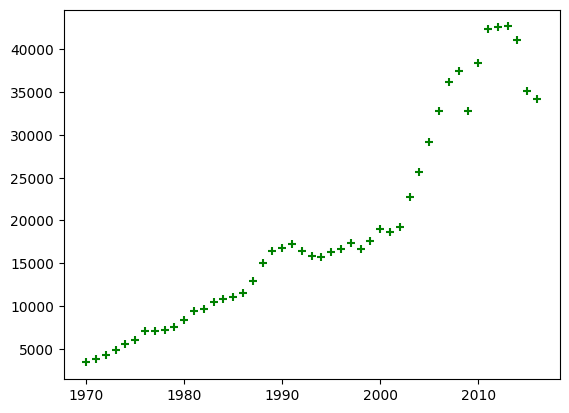

In [57]:
%matplotlib inline
plt.scatter(gdp['year'], gdp['per capita income (US$)'], color = "green", marker= "+")

In [61]:
x = gdp.drop('per capita income (US$)', axis ='columns')
x

,year
0,1970
1,1971
2,1972
3,1973
4,1974
5,1975
6,1976
7,1977
8,1978
9,1979


In [62]:
y = gdp['per capita income (US$)']

In [63]:
reg.fit(x, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [66]:
reg.predict([[2020]])

C:\Users\RANDY\Documents\data_eng_project\myenv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

In [81]:
predictions = pd.DataFrame({"year":list(range(2017, 2028))})
predictions

,year
0,2017
1,2018
2,2019
3,2020
4,2021
5,2022
6,2023
7,2024
8,2025
9,2026


In [82]:
gdps = reg.predict(predictions)

In [83]:
predictions['gdp'] = gdps

In [84]:
predictions

,year,gdp
0,2017,38803.298869
1,2018,39631.763944
2,2019,40460.229019
3,2020,41288.694094
4,2021,42117.159170
5,2022,42945.624245
6,2023,43774.089320
7,2024,44602.554395
8,2025,45431.019471
9,2026,46259.484546
